# Motion Simulator version 3.0

**Ver 1:**

- Implement the input section (see plan on OneNote)
- Implement the Processing (see plan on OneNote)
- Output: print out the array of points 

**Ver 2:**

- Improve output by plotting the trajectory
- Add 2D and 3D plot options

**Ver 3:**

- Animate the trajectory
- make simulated time agree with the animated time 

In [1]:
# Import libraries

# Numerical Python - Library for fast numerical vector and matrix calculations
import numpy as np

# Import matplotlib.pyplot for plotting graphs
import matplotlib.pyplot as plt

# This is a library extension to matplotlib to plot in 3D
from mpl_toolkits.mplot3d import Axes3D

# Import animation function for matplotlib and HTML for making HTML5 videos to display the animation in the browser
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


%matplotlib inline

## Input

In [38]:
#  Set final time T
T = 7

# Set the numer of time steps
N = 1000

# Determine the minimum number of time steps to have 60 fps
# Since T is a float we need to make the final number an integer. 
# This is achieved by rounding up and then changing the datatype to int.
N_min = int(np.ceil(T*60))

# If N is too small, set it to N_min.
# The number of time steps should not be lower than the number N_min of frames
# in our animation for the desired animated time at 60 fps
if N < N_min:
    N = N_min
    print("Warning! N is too small and has been set to N_min =", N_min)

# Set the time step (in s)
dt = T/N

# Define function for 2D trajectory
# Input: - time t
# output: - position vector at time t 
def trajectory(t):
    # linear motion with velocity (1,1)
    return np.array([t*np.cos(t),t*np.sin(t), np.cos(t)])

# Ben's Spiral turned to Star: np.array([t*np.cos(t**2),t*np.sin(t**2)])

# Aarav's Mystery: np.array([np.cos(t)**t-t,np.sin(t)])

# Will's Mountain: np.array([t*np.cos(t)**3,t*np.sin(t)**2+7])

# A simple spiral: np.array([t*np.cos(t)**2,t*np.sin(t)**2])


Warning! N is too small and has been set to N_min =  6000


##  Processing

In [39]:
# Initialise variables
t = 0
points = np.zeros((N+1,3))

# Calculate the N points on the trajectory for times with a time step dt apart
for i in range(N+1):
  # call function trajectory with time t
  points[i] = trajectory(t)
  # save the new point in array points
  # update the time by the time step
  t += dt

## Output 2D

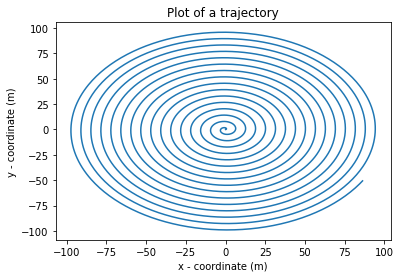

In [40]:
# print(points)

# x axis values
points_x = points[:,0]
# corresponding y axis values
points_y = points[:,1]
 
# plotting the points
plt.plot(points_x, points_y)
 
# naming the x axis
plt.xlabel('x - coordinate (m)')
# naming the y axis
plt.ylabel('y - coordinate (m)')
 
# giving a title to my graph
plt.title('Plot of a trajectory')

# Hack to make x-scale and y-scale the same
#plt.gca().set_aspect('equal', adjustable='box')

# function to show the plot
plt.show()


# Output 3D

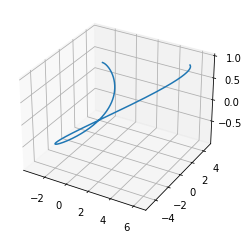

In [29]:
# We create a figure with 3D axes to plot the trajectory in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Like in 2D we have to save the x, y and z coordinates of the point particle in separate lists
points_X = points[:,0]
points_Y = points[:,1]
points_Z = points[:,2]

# Plot the 3D trajectory 
ax.plot(points_X, points_Y, points_Z)

plt.show()

## Output Animation

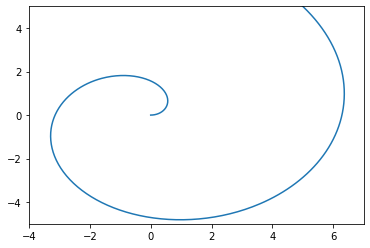

In [43]:
# Create the figure object and axis object for this plot
fig, ax = plt.subplots()

# Create the line object that will be plotted in the animation
ln, = plt.plot([], [])

# Initialisation of the first frame for the animation

# Work to do! Find a way how to determine the boundaries for the plot from the points numpy array holding 
# the data of the trajectory
def init():
    ax.set_xlim(-4, 7)
    ax.set_ylim(-5, 5)
    return ln,

# Calculate the skipping rate for skipping frames
skip_rate = N/N_min

# Set the plotting data for the given frame skipping frames if necessary
def animate(frame):
    # We update the plot `ln` with the plotting data for the given frame and return it back to the caller
    # The points of the particle have to be plotted until the time step that is calculated from the 
    # parameter `frame` as follows: The displayed time step = frame * skip_rate. We need to convert the 
    # resulting float into an integer. The data is obtained from the NumPy array points using slicing.
    ln.set_data(points[:int(frame*skip_rate),0], points[:int(frame*skip_rate),1])
    return ln,

# This is the main function that creates an animation with the number of frames being 
# set to N_min (defined in the Input section) and a 16.7 ms delay between frames for a frame rate of 60 fps
ani = FuncAnimation(fig, animate, frames=N_min,
                    init_func=init,interval=16.7, blit=True)
HTML(ani.to_html5_video())

## Test

In [3]:
arr = np.array([1, 2, 3, 4, 5])

print(arr)

print(type(arr))

[1 2 3 4 5]
<class 'numpy.ndarray'>


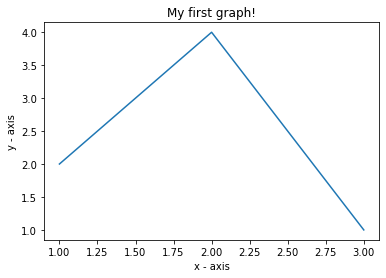

In [5]:
# importing the required module
import matplotlib.pyplot as plt
 
# x axis values
x = [1,2,3]
# corresponding y axis values
y = [2,4,1]
 
# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()


In [29]:
# x axis values
points_x = points[0]
# corresponding y axis values
points_y = [2,4,1]

print(points_x)

[0. 1.]


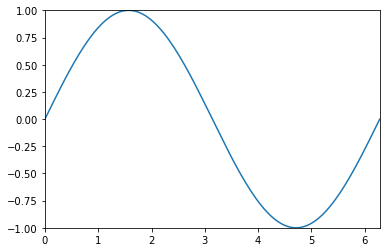

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [])

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
HTML(ani.to_html5_video())

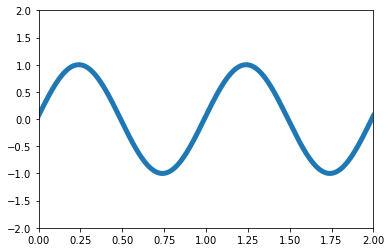

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=5)

# initialization function: plot the background of each frame
def init():
    # line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
HTML(anim.to_html5_video())


In [8]:
line?

Type:           Line2D
String form:    Line2D(_line0)
File:           c:\programdata\anaconda3\lib\site-packages\matplotlib\lines.py
Docstring:     
A line - the line can have both a solid linestyle connecting all
the vertices, and a marker at each vertex.  Additionally, the
drawing of the solid line is influenced by the drawstyle, e.g., one
can create "stepped" lines in various styles.
Init docstring:
Create a `.Line2D` instance with *x* and *y* data in sequences of
*xdata*, *ydata*.

Additional keyword arguments are `.Line2D` properties:

Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: float or None
    animated: bool
    antialiased or aa: bool
    clip_box: `.Bbox`
    clip_on: bool
    clip_path: Patch or (Path, Transform) or None
    color or c: color
    contains: unknown
    dash_capstyle: {'butt', 'round', 'projecting'}
    dash_joinstyle: {'miter', 'round', 'bevel'}
    dashes: sequen

In [20]:
points?

Type:            ndarray
String form:    
[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
           [ 1.00000000e-03  1.00000000e-09  1.00000000e <...> 51935098e+00 -5.23456396e+00  8.52020300e-01]
           [ 8.62318872e+00 -5.06365641e+00  8.62318872e-01]]
Length:          10001
File:            c:\programdata\anaconda3\lib\site-packages\numpy\__init__.py
Docstring:       <no docstring>
Class docstring:
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array

In [22]:
np.append(points,[1,1,0])

array([0., 0., 1., ..., 1., 1., 0.])

In [18]:
T =1.00011
N_min = int(np.ceil(T*60))

In [19]:
N_min

61

In [20]:
T*60

60.006600000000006

In [32]:
int(0.5)

0

In [33]:
int(0.7)

0

In [34]:
int(1.56)

1

In [35]:
N

1000

In [36]:
N/N_min

2.380952380952381